<center><h5>OPEN DATA PROJECT</h5></center>


<center><h1>THEFT IN RESIDENTIAL DEVELOPMENTS</h1></center>

<center><h1>-</h1></center>

<center><small>ELIJAH ESMERO</small></center>

<center><img src="images/crime_data_webpage.png"></center>

<center><img src="images/land_value_data_webpage.png"></center>

<center><img src="images/raw_sydney_map.png"></center>

<center><img src="images/edited_sydney_map.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20130816.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20190719.png"></center>

<center><img src="images/marsdenpark_theft_facebookposts/theft collage.png"></center>

<center><h1>DO RESIDENTIAL DEVELOPMENTS EXPERIENCE MORE THEFT?</h1></center>

<center><h3>OR RATHER...</h3></center>

<center><h1>DOES THE "THEFT PER HOUSE" IN A SUBURB INCREASE AS THE NUMBER OF HOUSES INCREASES?</h1></center>

<center><img src="images/land_value_data_webpage.png"></center>

In [1]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

required_zipfiles_list = [
 'LV_20170701.zip',
 'LV_20170801.zip',
 'LV_20170901.zip',
 'LV_20171001.zip',
 'LV_20171101.zip',
 'LV_20171201.zip',
 'LV_20180101.zip',
 'LV_20180201.zip',
 'LV_20180301.zip',
 'LV_20180401.zip',
 'LV_20180501.zip',
 'LV_20180601.zip',
 'LV_20180701.zip',
 'LV_20180801.zip',
 'LV_20180901.zip',
 'LV_20181001.zip',
 'LV_20181101.zip',
 'LV_20181201.zip',
 'LV_20190101.zip',
 'LV_20190201.zip',
 'LV_20190301.zip',
 'LV_20190401.zip',
 'LV_20190501.zip',
 'LV_20190601.zip',
 'LV_20190701.zip']

In [2]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

import requests
from pathlib import Path

# make list of local zip file paths
local_zipfile_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))

# make a list of strings from the local zip file paths
local_zipfile_list = [path.name for path in local_zipfile_path_list]

# check if required zipfiles are already downloaded, if not then download them
while(required_zipfiles_list != local_zipfile_list): # to repeat loop as case r.status_code may not be 200
    for zipfile in required_zipfiles_list:
        if zipfile in local_zipfile_list:
            print(zipfile + " is already downloaded")
        else: 
            url = "https://www.valuergeneral.nsw.gov.au/land_value_summaries/lvfiles/{}".format(zipfile)

            # get filename from url
            filename = url.split("/")[-1]

            # download file from url
            r = requests.get(url, stream = True)
            if r.status_code is 200:
                print("downloading " + zipfile)
                with open(filename,"wb") as f:
                    f.write(r.content)
            
# revise paths of local zip files
local_zipfile_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))

<center><img src="images/zipfile_extraction_size_difference.png"></center>

<center><img src="images/zipfile_contents.png"></center>

In [3]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [4]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

import zipfile
import pandas as pd

def concat_all_csv_in_zipfile_into_one_df(zipfile_path):
    with zipfile.ZipFile(zipfile_path) as zip:
        csv_in_zipfile_list = sorted(zip.namelist())[:-1]  # to exclude the commons.txt file
        df = pd.concat([pd.read_csv(zip.open(csv),
                                    encoding="ISO-8859-1",
                                    error_bad_lines=False,
                                    dtype=dtype_dict) for csv in csv_in_zipfile_list], sort=False)
    return df

lv_data_201907 = concat_all_csv_in_zipfile_into_one_df(local_zipfile_path_list[-1])
lv_data_201907

,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,...,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
0,1,CESSNOCK,3017030,NORMAL,NaN,NaN,25,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
1,1,CESSNOCK,3017031,NORMAL,NaN,NaN,27,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
2,1,CESSNOCK,3017032,NORMAL,NaN,NaN,41,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
3,1,CESSNOCK,3017033,NORMAL,NaN,NaN,43,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
4,1,CESSNOCK,3017034,NORMAL,NaN,NaN,45,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
5,1,CESSNOCK,3017035,NORMAL,NaN,NaN,47,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
6,1,CESSNOCK,3017036,NORMAL,NaN,NaN,49,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
7,1,CESSNOCK,3017037,NORMAL,NaN,NaN,51,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,246000.0,14A(1),6A(1),01/07/2014,241000.0,14A(1),6A(1),NaN
8,1,CESSNOCK,3017038,NORMAL,NaN,NaN,53,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,246000.0,14A(1),6A(1),01/07/2014,241000.0,14A(1),6A(1),NaN
9,1,CESSNOCK,3017019,NORMAL,NaN,NaN,3,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,234000.0,14A(1),6A(1),01/07/2014,229000.0,14A(1),6A(1),NaN


<center><h1>HOW DO I KNOW THAT THE LAND LISTING IS FOR A HOUSE?</h1></center>

In [38]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

list(lv_data_201907.columns)

['DISTRICT CODE',
 'DISTRICT NAME',
 'PROPERTY ID',
 'PROPERTY TYPE',
 'PROPERTY NAME',
 'UNIT NUMBER',
 'HOUSE NUMBER',
 'STREET NAME',
 'SUBURB NAME',
 'POSTCODE',
 'PROPERTY DESCRIPTION',
 'ZONE CODE',
 'AREA',
 'AREA TYPE',
 'BASE DATE 1',
 'LAND VALUE 1',
 'AUTHORITY 1',
 'BASIS 1',
 'BASE DATE 2',
 'LAND VALUE 2',
 'AUTHORITY 2',
 'BASIS 2',
 'BASE DATE 3',
 'LAND VALUE 3',
 'AUTHORITY 3',
 'BASIS 3',
 'BASE DATE 4',
 'LAND VALUE 4',
 'AUTHORITY 4',
 'BASIS 4',
 'BASE DATE 5',
 'LAND VALUE 5',
 'AUTHORITY 5',
 'BASIS 5',
 'Unnamed: 34']

- ## ~~LAND VALUE~~


- ## PROPERTY NAME
- ## AREA

In [5]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

sorted(lv_data_201907["PROPERTY NAME"][~lv_data_201907["PROPERTY NAME"].isnull()].unique())

[' ',
 ' ACCESS, COMMON ROOM & LANDSCAPED AREA',
 ' ALBURY HIGH SCHOOL',
 ' ASSISTANT STATION MASTERS RESIDENCE',
 ' BABY HEALTH CENTRE',
 ' BICENTENNIAL FLORA PARK',
 ' BLOOMVALE',
 ' BOWRAL HIGH SCHOOL',
 ' BUILDING F',
 ' COOPER PARK (PART)',
 ' DEDICATED PUBLIC RESERVE',
 ' DEGOTARDI PARK',
 ' FARM 268',
 ' FEURBAIX',
 ' GHOST GUMS',
 ' GIRL GUIDES HALL',
 ' GREEN POINT OBSERVATORY',
 ' GUNDY & MAXWELLTON',
 ' HALL',
 ' HILDA GARDENS',
 ' JETTY ADJOINING',
 ' JOHN WRIGHT PARK',
 ' KARINYA',
 ' KENDALL RESERVE',
 ' KOORINGLE',
 ' KULOO',
 ' LOT 15 ',
 ' LT 1 ',
 " LUND'S",
 ' MCDONALDS',
 ' NANAMI',
 ' NATIONAL PARK',
 ' PART BUCKIE STATION',
 ' PART DENMAN GOLF COURSE',
 ' PART RAILWAY LANDS',
 ' PART TAYLORS PLAINS',
 ' PART WILGAROON',
 ' PSH BINDOGUNDRA',
 ' PT KINGSFORD SMITH PARK',
 ' R 65994 PART FRANCIS PARK  RERVE',
 ' RECREATION DR',
 ' RIVERSIDE THEATRE',
 ' SANDELL',
 ' SHOP 2.2',
 ' SITE 27',
 ' SITE 28',
 ' ST CUTHBERTS ANGLICAN CHURCH',
 ' STUCKEYS CREEK',
 ' TELEPHON

<function matplotlib.pyplot.show(*args, **kw)>

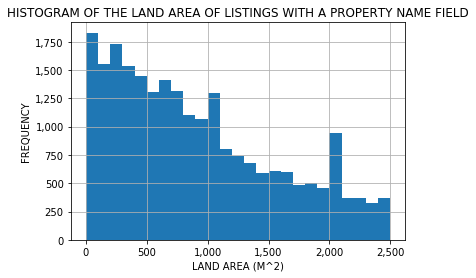

In [32]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

lv_data_201907_area_hist = lv_data_201907["AREA"][(lv_data_201907["AREA TYPE"] == "M") & \
                                                  ~lv_data_201907["PROPERTY NAME"].isnull()].hist(range=(0,2500), bins=25)
plt.xlabel("LAND AREA (M^2)")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF THE LAND AREA OF LISTINGS WITH A PROPERTY NAME FIELD")


# format axes
lv_data_201907_area_hist.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
lv_data_201907_area_hist.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

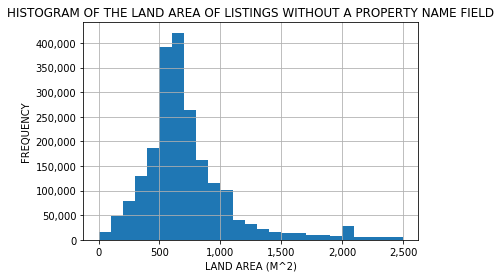

In [31]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

lv_data_201907_area_hist = lv_data_201907["AREA"][(lv_data_201907["AREA TYPE"] == "M") & \
                                                  lv_data_201907["PROPERTY NAME"].isnull()].hist(range=(0,2500), bins=25)
plt.xlabel("LAND AREA (M^2)")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF THE LAND AREA OF LISTINGS WITHOUT A PROPERTY NAME FIELD")

# format axes
lv_data_201907_area_hist.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
lv_data_201907_area_hist.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show

In [46]:
# ===================================
# AGGREGATING SUBURB HOUSE COUNT DATA
# ===================================

def get_suburb_house_count_from_lv_dataset(lv_dataset):
    suburb_house_count = lv_dataset[lv_dataset["PROPERTY NAME"].isnull() & \
                                                 (lv_dataset["AREA TYPE"] == "M") & \
                                                 (lv_dataset["AREA"] > 200) & \
                                                 (lv_dataset["AREA"] < 1000)].groupby("SUBURB NAME").count().max(axis=1)
    return suburb_house_count
    
get_suburb_house_count_from_lv_dataset(lv_data_201907)

SUBURB NAME
ABBOTSBURY           1132
ABBOTSFORD            866
ABERCROMBIE           197
ABERDARE              316
ABERDEEN              345
ABERGLASSLYN         1657
ABERMAIN              603
ABERNETHY              19
ACACIA CREEK            1
ACACIA GARDENS       1048
ADAMINABY             109
ADAMSTOWN            1983
ADAMSTOWN HEIGHTS    1880
ADELONG                68
ADJUNGBILLY             1
AFTERLEE                1
AGNES BANKS           110
AIRDS                1129
AKOLELE                50
ALBERT                  5
ALBION PARK          4168
ALBION PARK RAIL     2072
ALBURY               1920
ALDAVILLA              22
ALECTOWN                1
ALEXANDRIA            344
ALFORDS POINT         892
ALFREDTOWN              4
ALICE                   1
ALLAMBIE HEIGHTS     1960
                     ... 
YALLAROI                1
YALWAL                  1
YAMBA                2387
YANCO                  49
YANDERRA               26
YARRAGUNDRY             1
YARRAHAPINNI            8


In [58]:
# ===================================
# AGGREGATING SUBURB HOUSE COUNT DATA
# ===================================

import time

start_time = time.time()

# get the house count for all monthly data
suburb_house_count = pd.concat([get_suburb_house_count_from_lv_dataset(concat_all_csv_in_zipfile_into_one_df(local_zipfile)) \
                                for local_zipfile in local_zipfile_path_list], sort=False, axis=1)

elapsed_time = time.time() - start_time
print(elapsed_time)

suburb_house_count

437.1082546710968


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
ABBOTSBURY,1130.0,1130.0,1130.0,1130.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,...,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0
ABBOTSFORD,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,...,865.0,865.0,865.0,864.0,864.0,864.0,864.0,866.0,866.0,866.0
ABERCROMBIE,184.0,184.0,184.0,184.0,196.0,196.0,196.0,196.0,196.0,196.0,...,196.0,196.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0
ABERDARE,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,...,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0
ABERDEEN,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,...,343.0,343.0,344.0,344.0,344.0,344.0,345.0,345.0,345.0,345.0
ABERGLASSLYN,1552.0,1582.0,1582.0,1582.0,1583.0,1601.0,1601.0,1601.0,1602.0,1602.0,...,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1657.0,1657.0
ABERMAIN,599.0,599.0,599.0,599.0,599.0,601.0,601.0,601.0,601.0,601.0,...,601.0,601.0,601.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0
ABERNETHY,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
ACACIA CREEK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACACIA GARDENS,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,...,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0


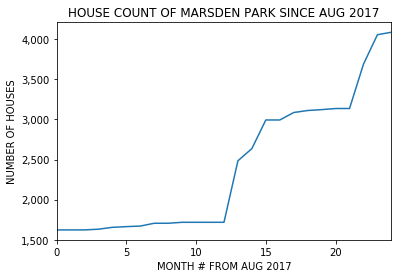

In [79]:
# ===================================
# AGGREGATING SUBURB HOUSE COUNT DATA
# ===================================

marsdenpark_house_count_timeseries_plot = suburb_house_count.loc["MARSDEN PARK"].plot()

# format graph
plt.xlabel("MONTH # FROM AUG 2017")
plt.ylabel("NUMBER OF HOUSES")
plt.title("HOUSE COUNT OF MARSDEN PARK SINCE AUG 2017")
marsdenpark_house_count_timeseries_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<center><img src="images/crime_data_webpage.png"></center>

In [80]:
# month_series = pd.Series(csv_stem_list.apply(lambda row: row[:6]).apply(lambda row: calendar.month_name[int(row[-2:])]).apply(lambda row: row[:3].capitalize()), 
#                          name="MONTH")

# year_series = pd.Series(csv_stem_list.apply(lambda row: row[:4]), name="YEAR")
# month_year_series = month_series + " " + year_series

lv_dataset_year_month = pd.Series([local_zipfile.replace("LV_", "").replace(".zip", "") \
                                   for local_zipfile in local_zipfile_list])

# THE RESULTS

# FUNNY THINGS
## DEFQON
## UNSW